In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\harip\Instacart Basket Analysis"

In [3]:
# Import orders_products_merged
ords_prods_merged = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data','customers_orders_merged.pkl'))

In [4]:
#Importing necessary analysis
ords_prods_merged.shape

(32404859, 34)

In [5]:
ords_prods_merged.dtypes

product_id                    int64
product_name                 object
aisle_id                      int64
department_id                 int64
prices                      float64
order_id                      int64
user_id                       int64
order_number                  int64
orders_day_of_week            int64
orders_timing_in_day          int64
days_since_prior_order      float64
add_to_cart_order             int64
reordered                     int64
_merge                     category
 price_range_loc             object
price_range_loc              object
busiest_day                  object
Busiest_days                 object
Busiest_period_of_day        object
max_order                     int64
loyalty_flag                 object
average_price               float64
spending_flag                object
median_days_prior_order     float64
frequency_flag               object
First Name                   object
Last Name                    object
Gender                      

In [6]:
ords_prods_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,No of dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Non frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Non frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Non frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Non frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Non frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


<Axes: >

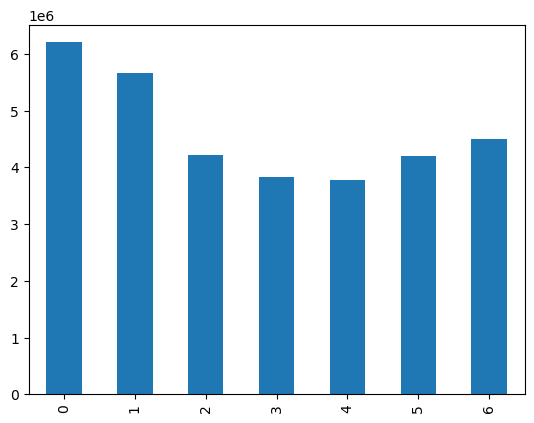

In [7]:
#Creating bar charts
ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

Text(0, 0.5, 'No of orders')

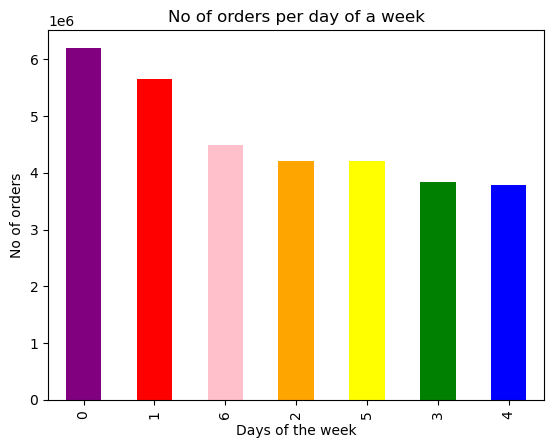

In [8]:
bar = ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
#Customization
plt.title ('No of orders per day of a week')
plt.xlabel ('Days of the week')
plt.ylabel ('No of orders')

In [9]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

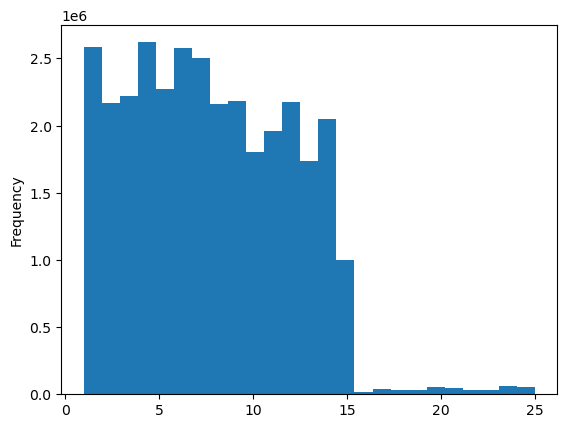

In [10]:
#Creating histogram for prices column
ords_prods_merged['prices'].plot.hist(bins = 25)

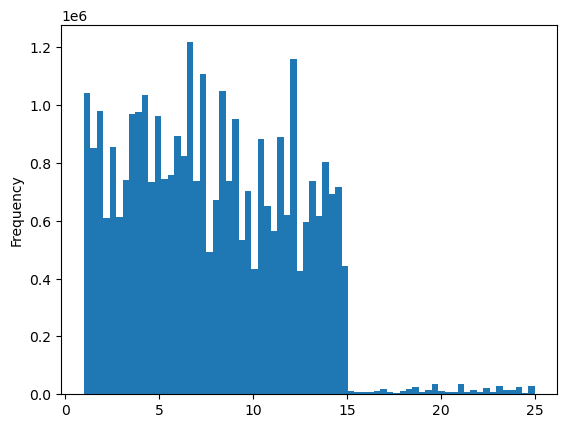

In [11]:
#Creating histogram for prices column
hist_2= ords_prods_merged['prices'].plot.hist(bins = 70)

In [12]:
#Exporting histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_orders_dow.png'))

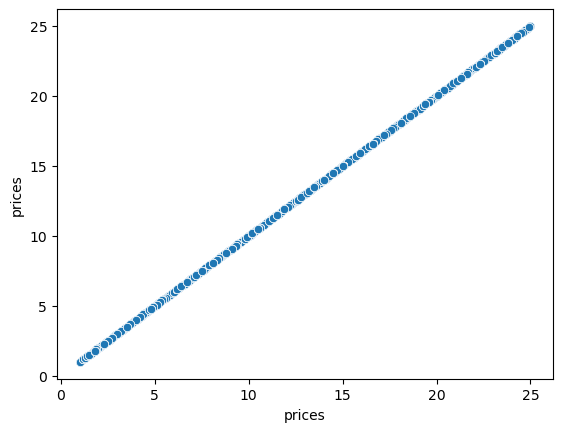

In [13]:
#Creating scatterplots for prices
scatterplot=sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [14]:
ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_timing_in_day,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,No of dependants,fam_status,income


In [15]:
ords_prods_merged.loc[ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [16]:
#Exporting scatterplots
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_orders_dow.png'))

In [17]:
#Creating line charts
#creating a sampling data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [18]:
#Storing 70% in big dev
big= ords_prods_merged[dev]

In [19]:
#Storing 30% in small dev
small=ords_prods_merged[~dev]

In [20]:
#Total no of rows
len(ords_prods_merged)

32404859

In [21]:
#Checking the sampling
len(big)+ len(small)

32404859

In [22]:
#To further reduce the size of samplings
df_2 = small[['orders_day_of_week','prices']]

In [23]:
df_3 = small[['orders_timing_in_day', 'prices']]

Text(0, 0.5, 'Average prices of the order in USD')

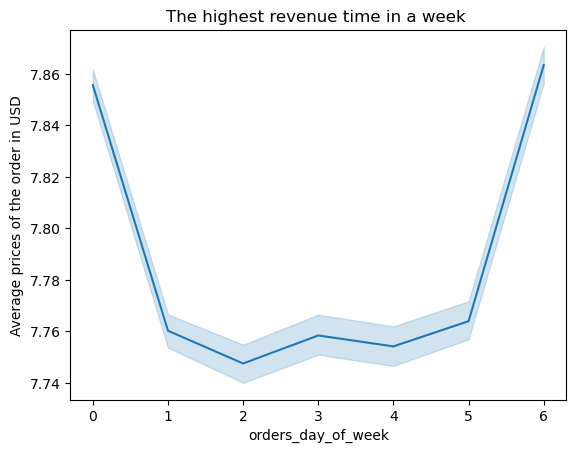

In [24]:
#Creating line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
plt.title('The highest revenue time in a week ')
plt.ylabel('Average prices of the order in USD')

In [25]:
#Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_orders_dow.png'))

Text(0, 0.5, 'Average prices of each_order in USD')

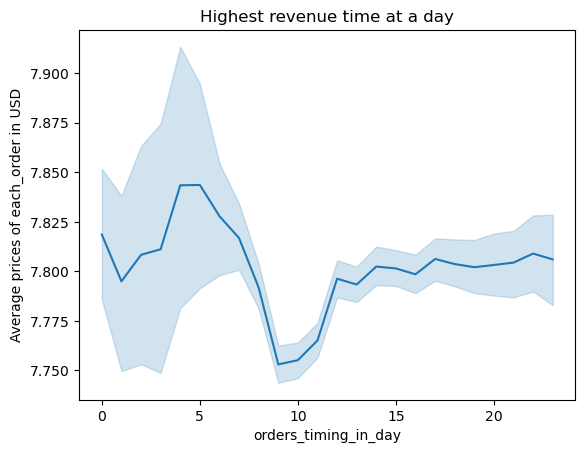

In [26]:
#Creating a line chart for 'Order_timing_in_day
line_3 = sns.lineplot(data = df_3, x = 'orders_timing_in_day',y = 'prices')
plt.title ('Highest revenue time at a day')
plt.ylabel ('Average prices of each_order in USD')

In [27]:
#Exporting line chart
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_orders_timing.png'))

# #Creating a histogram of the “orders_timing_in_day” column

Text(0, 0.5, 'Frequency of order in the hour')

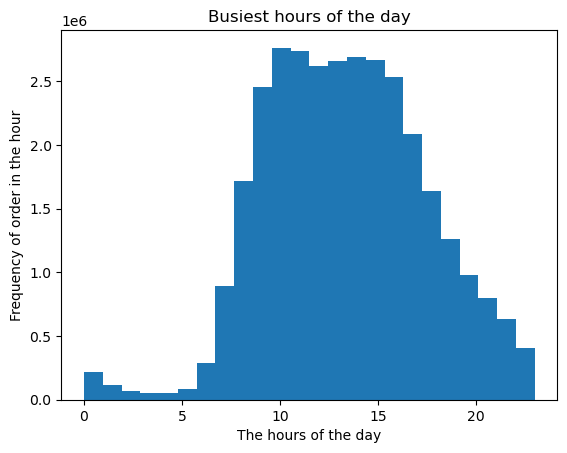

In [28]:
hist_3= ords_prods_merged['orders_timing_in_day'].plot.hist(bins=24)
plt.title('Busiest hours of the day')
plt.xlabel('The hours of the day')
plt.ylabel('Frequency of order in the hour')

Observation:
This histogram shows the frequency of the shoppers. The lowest frequency is from 0 to 6 hrs and the highest frequency is from 9- 16 hrs. After, 16.00 hrs it gradually decreases.

Text(0.5, 1.0, 'Loyalty of the customers')

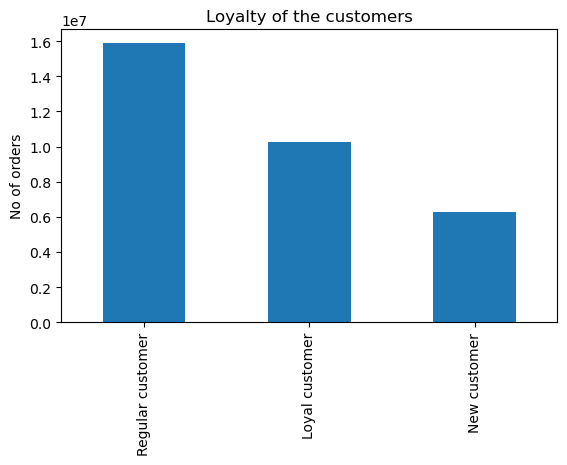

In [29]:
#Creating a bar chart from the “loyalty_flag” column.
bar_2= ords_prods_merged['loyalty_flag'].value_counts().plot.bar()
plt.subplots_adjust(bottom = 0.27)
plt.ylabel ('No of orders')
plt.title('Loyalty of the customers')

Observation: From the above bar chart its clear that the regular customers are higher than the other two categories.

In [30]:
#Line Chart to determine if there's a difference in expenditure between hour of day and prices
df_line_2 = small[['Age', 'No of dependants']]

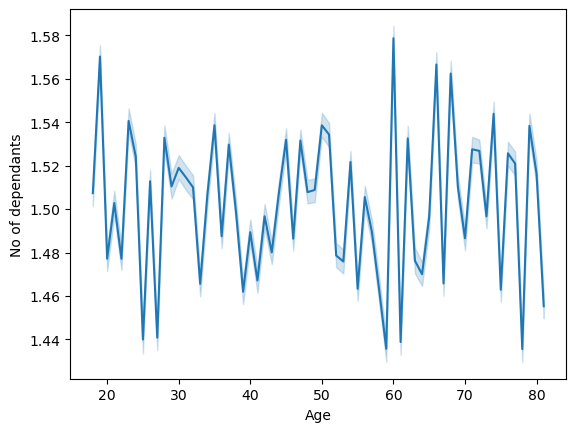

In [31]:
#Creating the line chart
line_2 = sns.lineplot(data = df_line_2, x = 'Age', y = 'No of dependants')

Observation: 
From the line chart there doesn't seem any real connection between age and number of dependents. As, the 18-20 age group has peak, whereas 20 to 30 there is not a much spike. The above 40s has a slight upward trend but a real spike is seen after 60 years. Although, I don't see any particular pattern of trend here.

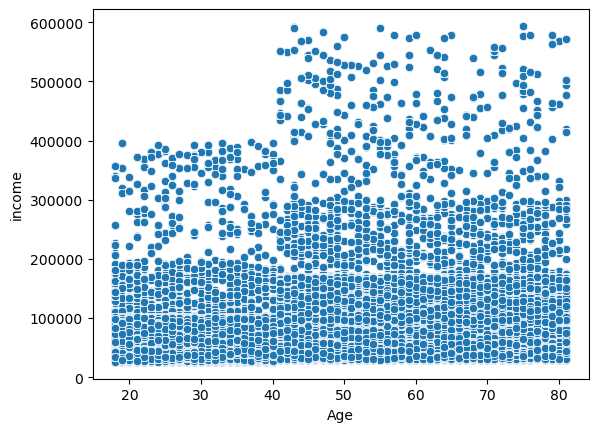

In [32]:
#Scatterplot to determine if there is a connection between age and spending power
scat_2 = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_merged)

Observation:
From the scatterplot, its clear that the age group above 40+ are earning more when compared to 20s and 30s and it makes sense as it may be because of the experience and expertise they gained in all these years. In the early 20s and 30s no one crossed a income of 400k whereas above 40s they reach till 600k.

# Exporting as png files

In [34]:
#Exporting histogram chart
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_3_chart_orders_dow.png'))

In [35]:
#Exporting bar chart
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_2_chart_orders_dow.png'))

In [36]:
#Exporting line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_2_chart_orders_dow.png'))

In [38]:
#Exporting Scatterplot
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatterplot_2_chart_orders_dow.png'))